In [1]:
import sys
sys.path.append("../../")
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from agnpy.targets import Disk
from agnpy.particles import Blob

In [2]:
MEC2 = (const.m_e * const.c * const.c).cgs.value

spectrum_norm = 8e47 * u.Unit("erg")
parameters = {"p1": 1.9, "p2": 3.5, "gamma_b": 130, "gamma_min": 2.0, "gamma_max": 3e5}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 2e16 * u.cm
B = 0.35 * u.G
z = 0.361
delta_D = 35.3
Gamma = 22.5

blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
print(f"normalization {blob.norm:.2e}")

normalizing power-law to total energy density u_e: 0.023873241463784306 erg cm-3
normalization 2.58e+03 1 / cm3


In [3]:
# disk parameters
M_BH = np.power(10, 8.20) * const.M_sun
L_disk = 1.13 * 1e46 * u.Unit("erg s-1")
R_g = ((const.G * M_BH) / (const.c * const.c)).cgs
eta = 0.1
R_in = 6 * R_g
R_out = 200 * R_g

r = 7e17 * u.cm

disk = Disk(M_BH, L_disk, eta, R_in, R_out, r)

(1e-20, 1e-10)

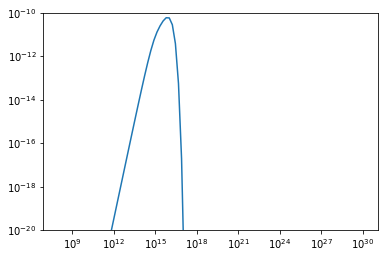

In [4]:
nu = np.logspace(8, 30, 100) * u.Hz
sed = disk.sed(nu, blob)
plt.loglog(nu, sed)
plt.ylim([1e-20, 1e-10])

In [5]:
sed

<Quantity [3.43988915e-032, 1.59665496e-031, 7.41101474e-031,
           3.43988747e-030, 1.59665366e-029, 7.41100462e-029,
           3.43987963e-028, 1.59664759e-027, 7.41095765e-027,
           3.43984326e-026, 1.59661943e-025, 7.41073965e-025,
           3.43967447e-024, 1.59648875e-023, 7.40972782e-023,
           3.43889109e-022, 1.59588226e-021, 7.40503271e-021,
           3.43525676e-020, 1.59306951e-019, 7.38326987e-019,
           3.41842631e-018, 1.58006379e-017, 7.28290038e-017,
           3.34113884e-016, 1.52077160e-015, 6.83090272e-015,
           3.00029438e-014, 1.26856458e-013, 5.02628854e-013,
           1.78452138e-012, 5.31918147e-012, 1.25838924e-011,
           2.42954829e-011, 4.10317486e-011, 5.77545164e-011,
           5.66504606e-011, 2.75874872e-011, 3.72872841e-012,
           5.47364833e-014, 1.91183926e-017, 1.29750611e-023,
           2.55309824e-034, 1.17387835e-052, 8.37600175e-084,
           2.38284453e-136, 1.35325224e-224, 0.00000000e+000,
        